In [35]:
# this notebook is for plotting
# the end to end analysis
import numpy as np
import matplotlib.pyplot as plt
import os
#load mdtraj
import mdtraj
import mdtraj as md

## 4 a) reads in the data file Data/1hz3_T310.run.25000000.energy.xvg

In [36]:
all_energy_file= np.loadtxt('../Data/1hz3_T310.run.25000000.energy.xvg', skiprows=29, dtype=float)

## 4 b) Make 6 separate plots for each quantity vs time, with time in ns

In [37]:
y_label=["Potential(kJ/mol)","Kinetic En.(kJ/mol)","Total Energy(kJ/mol)",
         "Temperature(K)","Pressure(bar)","Volume(nm^3)"]

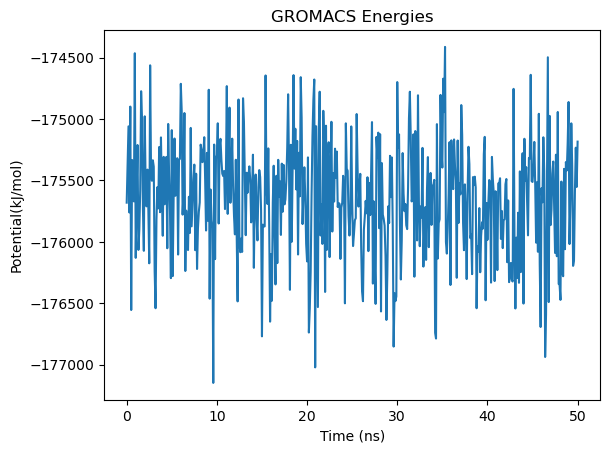

In [38]:
# read numpy array, and change time(ps) to time(ns)
plt.plot(all_energy_file[:,0]/1000, all_energy_file[:,1])
plt.xlabel('Time (ns)')
plt.ylabel(y_label[0])
plt.title('GROMACS Energies')
plt.show()

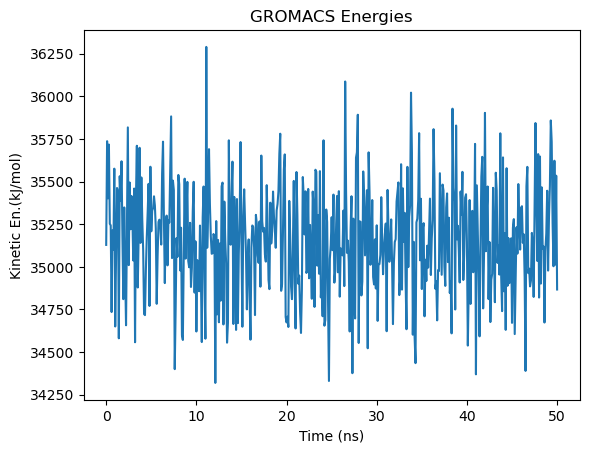

In [39]:
# read numpy array, and change time(ps) to time(ns)
plt.plot(all_energy_file[:,0]/1000, all_energy_file[:,2])
plt.xlabel('Time (ns)')
plt.ylabel(y_label[1])
plt.title('GROMACS Energies')
plt.show()

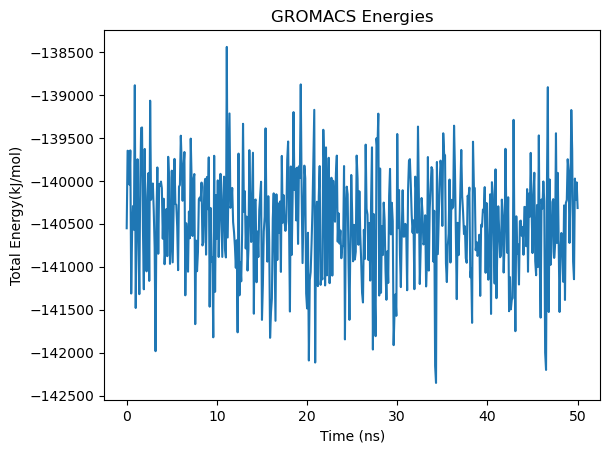

In [40]:
# read numpy array, and change time(ps) to time(ns)
plt.plot(all_energy_file[:,0]/1000, all_energy_file[:,3])
plt.xlabel('Time (ns)')
plt.ylabel(y_label[2])
plt.title('GROMACS Energies')
plt.show()

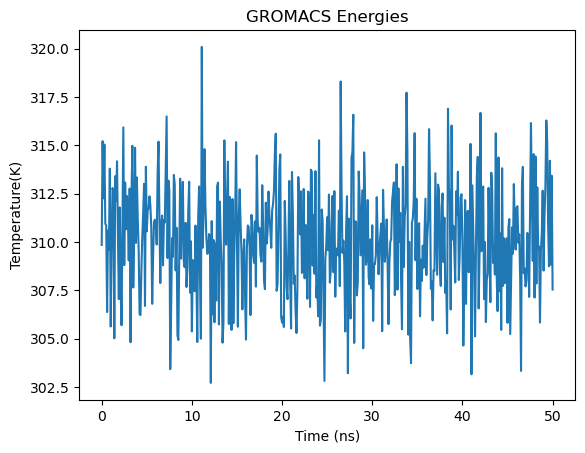

In [41]:
# read numpy array, and change time(ps) to time(ns)
plt.plot(all_energy_file[:,0]/1000, all_energy_file[:,4])
plt.xlabel('Time (ns)')
plt.ylabel(y_label[3])
plt.title('GROMACS Energies')
plt.show()

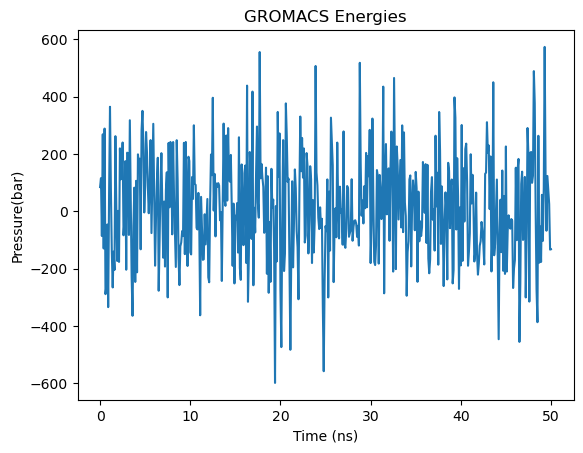

In [42]:
# read numpy array, and change time(ps) to time(ns)
plt.plot(all_energy_file[:,0]/1000, all_energy_file[:,5])
plt.xlabel('Time (ns)')
plt.ylabel(y_label[4])
plt.title('GROMACS Energies')
plt.show()

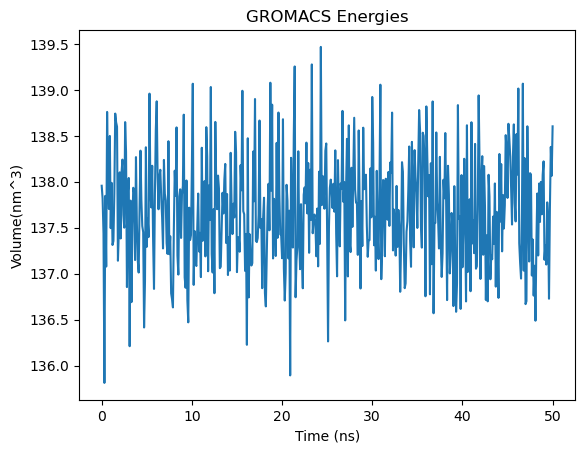

In [43]:
# read numpy array, and change time(ps) to time(ns)
plt.plot(all_energy_file[:,0]/1000, all_energy_file[:,6])
plt.xlabel('Time (ns)')
plt.ylabel(y_label[5])
plt.title('GROMACS Energies')
plt.show()

## 4 c) Make a plot that has kinetic energy and temperature on the same plot, where the left axis is temperature and the right axis is kinetic energy, using different colors and different axis labels


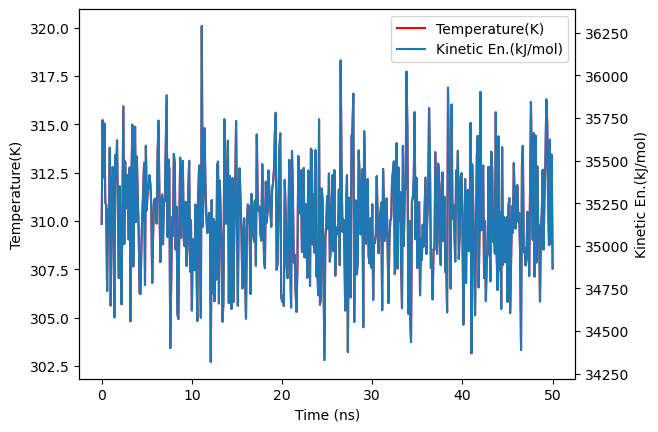

In [44]:
fig=plt.figure()
ax_right = fig.add_subplot(111)
line_T=ax_right.plot(all_energy_file[:,0]/1000, all_energy_file[:,4],'-r',label =y_label[3])

ax_left = ax_right.twinx()
line_E=ax_left.plot(all_energy_file[:,0]/1000, all_energy_file[:,2],label =y_label[1])

ax_right.legend(line_T+line_E,[y_label[3],y_label[1]],loc=0)

ax_right.set_xlabel('Time (ns)')
ax_right.set_ylabel(y_label[3])
ax_left.set_ylabel(y_label[1])

plt.show()

## 5 a) read in the ubiquitin structure

In [45]:
pdb_1ubq=md.load('../Data/1UBQ_processed.pdb')

## 5 b) print the total number of hydrogen bonds

In [46]:
hydrogen_bonds=md.baker_hubbard(pdb_1ubq)
print(len(hydrogen_bonds))

57


## 5 c) compute the number of helical amino acids

In [47]:
# Compute Dictionary of protein secondary structure secondary structure assignments
protein_2Dstructure=mdtraj.compute_dssp(pdb_1ubq,simplified=True)
helical_amino_acids=np.sum(protein_2Dstructure=='H')
print(helical_amino_acids)

18


## 6 a) read in the md trajectory of beta amyloid

In [48]:
# top file is ../Data/1hz3_T310.start.nowater.gro
# trajectory file is ../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc
# load the trajectory
traj = md.load_xtc('../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='../Data/1hz3_T310.start.nowater.gro')

## 6 b) compute the end-end distance at each time, and the radius of gyration at each time

In [49]:
# compute the distance between the first and last atom
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

# compute the distance between the first and last atom
dist = end_end(traj)

#compute the radius of gyration
radius=mdtraj.compute_rg(traj)

## 6 c) plot the end-end distance and radius of gyration vs time on the same plot, clearly labeled (same y axis is fine this time)

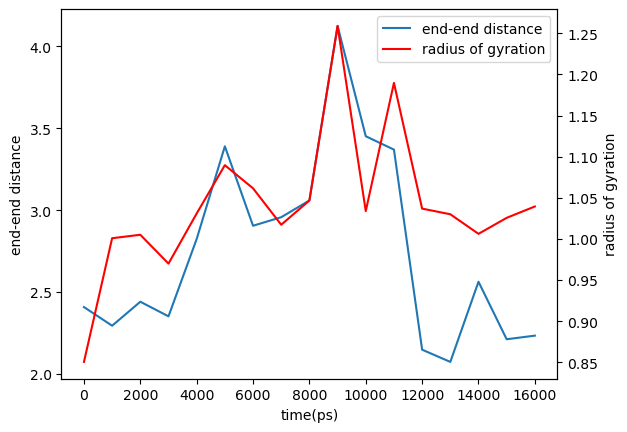

In [57]:
fig=plt.figure()
ax=fig.add_subplot(111)

line_distance=ax.plot(traj.time,dist,label='end-end distance')

ax_left=ax.twinx()
line_radius=ax_left.plot(traj.time,radius,'-r',label='radius of gyration')

ax.legend(line_distance+line_radius,['end-end distance','radius of gyration'],loc=0)
ax.set_xlabel('time(ps)')
ax.set_ylabel('end-end distance')
ax_left.set_ylabel('radius of gyration')

plt.show()

## 6 d) plot a normalized histogram of end-end distance and another of radius of gyration

Text(0.5, 0, 'end-end distance')

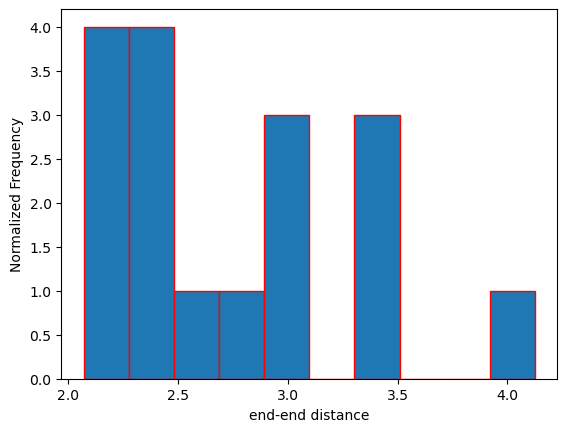

In [82]:
plt.hist(dist,edgecolor='r')
plt.ylabel('Normalized Frequency')
plt.xlabel('end-end distance')

Text(0.5, 0, 'radius of gyration')

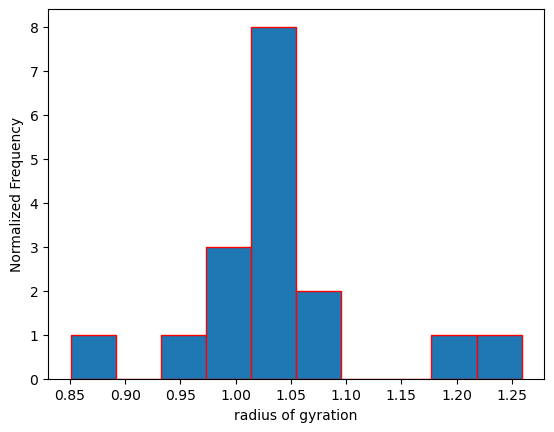

In [83]:
plt.hist(radius,edgecolor='r')
plt.ylabel('Normalized Frequency')
plt.xlabel('radius of gyration')